# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dabl #For data pipeline and visualization
import shap #XAI methodology


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA


# Import Dataset

In [6]:
data = pd.read_csv(r"C:\Users\Daraz\Desktop\My_stuff\Report_writing\Data Folder\April_19-24.csv") 

In [7]:
data.head(10)

,Unnamed: 0,Create Date,tenant_name,robot_code,robot_name,from_id,from_name,Session_id,Intention,user_id,...,is_chat_recommend,is_chat_no answer,is_chat_pre/post match,live agent_session_id,Last Query Before Live Agent Session,Live Agent User Query,Live Agent Response,Feedback Type,Unsatisfied Reason,resolved or unresolved
0,8606,2022-04-23 0:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,460f9124dff64044b4625896db956731,route_daraz_others,2.100000e+15,...,Y,N,N,NaN,NaN,NaN,NaN,SATISFIED,NaN,UNRESOLVED
1,22637,2022-04-24 0:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,f453203786d3478bac0694118c186628,route_daraz_others,2.100000e+15,...,N,N,N,2e9619dbd227492c8ec15d884f4eb5dd,Daz chat,??????|||এটা আমি কিভাবে আমি পন্য টা |||ভাই আমা...,আপনার অর্ডার গুলো কন্ফার্ম আছে স্যার।|||জানিয়ে...,NaN,NaN,UNRESOLVED
2,961,2022-04-24 0:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,98e6d11d1a874373a0b0b3d6b3ed67e7,route_daraz_others,2.100000e+15,...,N,Y,N,708abea1672c4987af0ed4af4116da4f,এখন কি করবো,Plz help me|||আমার ইমেইল নিচ্ছে না|||এখন আপনি ...,আমরা খুব ই দুঃখিত আপনার খারাপ অভিজ্ঞতার জন্য স...,NaN,NaN,UNRESOLVED
3,1828,2022-04-23 0:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,c7905370d3c4444d9e579cc460012df9,route_daraz_others,2.100000e+15,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,UNRESOLVED
4,25752,2022-04-21 0:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,9a8482f50743418a8881dbb5d0bec866,NaN,2.100000e+15,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,UNRESOLVED
5,9135,2022-04-23 0:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,3ebafbe2df1c468ab557f55502c0d92f,route_daraz_others,2.100000e+15,...,N,Y,N,09b89666b7494fb884ff90928b81a1cf,Sir amar order conform hocce na kano,Ji na sir ami age oita Try kori then na hole a...,Apni jodi aj amar apnake service deyar process...,NaN,NaN,UNRESOLVED
6,16064,2022-04-24 0:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,fc395be61d1346b5b7d2696500f31686,route_daraz_others,2.100000e+15,...,N,N,N,5f2084942bbc49228c34d5c835444310,bhai eta 30 april dewa jabe,Choto bhai heshebe abder korlam apu|||assa apu...,Sir apnar ponnoti desher baire item tai eti di...,NaN,NaN,UNRESOLVED
7,28891,2022-04-21 0:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,0c56a0f181b54cea93ec47a90ac646ff,route_daraz_others,2.100000e+15,...,N,N,N,d6670315dbb7423c847a158da3374cc1,বাংলা,কল দিতে পরবা,Good day! Welcome to Daraz Live chat support. ...,NaN,NaN,UNRESOLVED
8,26134,2022-04-21 0:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,82e3eae8397e40a7a2cd13ddf725828f,route_daraz_others,2.100000e+15,...,N,N,N,NaN,NaN,NaN,NaN,UNSATISFIED,অনেক শব্দ আছে পড়ার জন্য,UNRESOLVED
9,28460,2022-04-22 0:00:00,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,ee1a1e1776254414be9f0091732a0742,route_daraz_others,2.100000e+15,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,UNRESOLVED


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1000 non-null   int64  
 1   Create Date                           1000 non-null   object 
 2   tenant_name                           1000 non-null   object 
 3   robot_code                            1000 non-null   object 
 4   robot_name                            1000 non-null   object 
 5   from_id                               1000 non-null   object 
 6   from_name                             1000 non-null   object 
 7   Session_id                            1000 non-null   object 
 8   Intention                             819 non-null    object 
 9   user_id                               1000 non-null   float64
 10  Seller id (X-space)                   1000 non-null   float64
 11  user_nick         

In [9]:
data.drop('Create Date', axis = 'columns', inplace = True) #dropping the 1st column

In [10]:
data.head(10)

,Unnamed: 0,tenant_name,robot_code,robot_name,from_id,from_name,Session_id,Intention,user_id,Seller id (X-space),...,is_chat_recommend,is_chat_no answer,is_chat_pre/post match,live agent_session_id,Last Query Before Live Agent Session,Live Agent User Query,Live Agent Response,Feedback Type,Unsatisfied Reason,resolved or unresolved
0,8606,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,460f9124dff64044b4625896db956731,route_daraz_others,2.100000e+15,7.000000e+11,...,Y,N,N,NaN,NaN,NaN,NaN,SATISFIED,NaN,UNRESOLVED
1,22637,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,f453203786d3478bac0694118c186628,route_daraz_others,2.100000e+15,7.000000e+11,...,N,N,N,2e9619dbd227492c8ec15d884f4eb5dd,Daz chat,??????|||এটা আমি কিভাবে আমি পন্য টা |||ভাই আমা...,আপনার অর্ডার গুলো কন্ফার্ম আছে স্যার।|||জানিয়ে...,NaN,NaN,UNRESOLVED
2,961,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,98e6d11d1a874373a0b0b3d6b3ed67e7,route_daraz_others,2.100000e+15,7.010000e+11,...,N,Y,N,708abea1672c4987af0ed4af4116da4f,এখন কি করবো,Plz help me|||আমার ইমেইল নিচ্ছে না|||এখন আপনি ...,আমরা খুব ই দুঃখিত আপনার খারাপ অভিজ্ঞতার জন্য স...,NaN,NaN,UNRESOLVED
3,1828,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,c7905370d3c4444d9e579cc460012df9,route_daraz_others,2.100000e+15,7.000000e+11,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,UNRESOLVED
4,25752,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,9a8482f50743418a8881dbb5d0bec866,NaN,2.100000e+15,7.000000e+11,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,UNRESOLVED
5,9135,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,3ebafbe2df1c468ab557f55502c0d92f,route_daraz_others,2.100000e+15,7.000000e+11,...,N,Y,N,09b89666b7494fb884ff90928b81a1cf,Sir amar order conform hocce na kano,Ji na sir ami age oita Try kori then na hole a...,Apni jodi aj amar apnake service deyar process...,NaN,NaN,UNRESOLVED
6,16064,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,fc395be61d1346b5b7d2696500f31686,route_daraz_others,2.100000e+15,7.000000e+11,...,N,N,N,5f2084942bbc49228c34d5c835444310,bhai eta 30 april dewa jabe,Choto bhai heshebe abder korlam apu|||assa apu...,Sir apnar ponnoti desher baire item tai eti di...,NaN,NaN,UNRESOLVED
7,28891,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,0c56a0f181b54cea93ec47a90ac646ff,route_daraz_others,2.100000e+15,7.010000e+11,...,N,N,N,d6670315dbb7423c847a158da3374cc1,বাংলা,কল দিতে পরবা,Good day! Welcome to Daraz Live chat support. ...,NaN,NaN,UNRESOLVED
8,26134,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,82e3eae8397e40a7a2cd13ddf725828f,route_daraz_others,2.100000e+15,7.010000e+11,...,N,N,N,NaN,NaN,NaN,NaN,UNSATISFIED,অনেক শব্দ আছে পড়ার জন্য,UNRESOLVED
9,28460,Alime-DRZ-CC-BD,03thkMNkQ3,BD-Daz-LC,T0Bc8Nk94E,BD-Daz-LC-HC-App,ee1a1e1776254414be9f0091732a0742,route_daraz_others,2.100000e+15,7.010000e+11,...,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,UNRESOLVED


In [11]:
len(data.index)

1000

In [12]:
data.isnull().sum()

Unnamed: 0                                0
tenant_name                               0
robot_code                                0
robot_name                                0
from_id                                   0
from_name                                 0
Session_id                                0
Intention                               181
user_id                                   0
Seller id (X-space)                       0
user_nick                                 0
create_time                               0
chat_uuid                                 0
Enter Type                              217
query                                     0
Question Type                             0
sopname                                 697
answer_type                             221
SOP_Solution_id                         799
SOP_Solution_Name                       799
Standard Knowledge Title                621
Knowledge_id                            618
knowledge_cate_1_name           

# EDA (Exploratory Data Analysis)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            1000 non-null   int64  
 1   tenant_name                           1000 non-null   object 
 2   robot_code                            1000 non-null   object 
 3   robot_name                            1000 non-null   object 
 4   from_id                               1000 non-null   object 
 5   from_name                             1000 non-null   object 
 6   Session_id                            1000 non-null   object 
 7   Intention                             819 non-null    object 
 8   user_id                               1000 non-null   float64
 9   Seller id (X-space)                   1000 non-null   float64
 10  user_nick                             1000 non-null   object 
 11  create_time       

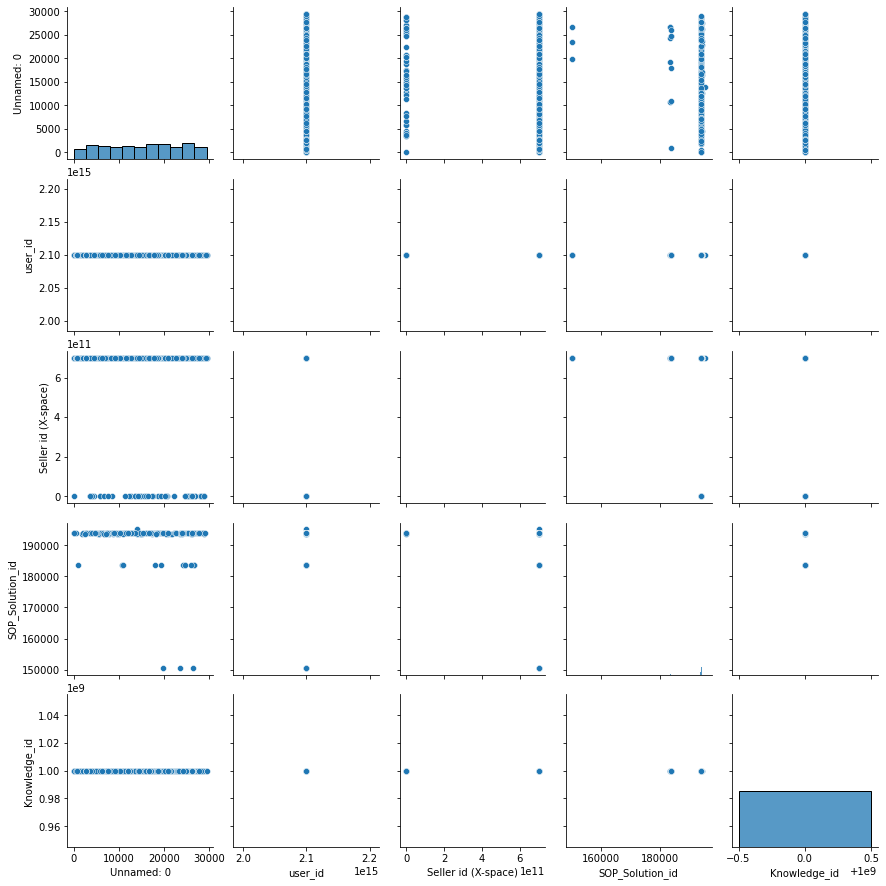

In [14]:
sns.pairplot(data)
plt.show() #Data Visualiztion

Target looks like regression


Dropped 1 outliers in column bumbles.
Dropped 4 outliers in column honeybee.


[array([[<AxesSubplot:title={'center':'F=2.38E+04'}, xlabel='fruitset', ylabel='yield'>,
         <AxesSubplot:title={'center':'F=9.42E+03'}, xlabel='seeds'>,
         <AxesSubplot:title={'center':'F=4.99E+03'}, xlabel='fruitmass'>,
         <AxesSubplot:title={'center':'F=3.21E+02'}, xlabel='AverageRainingDays'>],
        [<AxesSubplot:title={'center':'F=3.19E+02'}, xlabel='RainingDays', ylabel='yield'>,
         <AxesSubplot:title={'center':'F=2.82E+02'}, xlabel='clonesize'>,
         <AxesSubplot:title={'center':'F=1.32E+02'}, xlabel='osmia'>,
         <AxesSubplot:title={'center':'F=8.20E+01'}, xlabel='bumbles'>],
        [<AxesSubplot:title={'center':'F=2.82E+01'}, xlabel='MaxOfLowerTRange', ylabel='yield'>,
         <AxesSubplot:title={'center':'F=2.81E+01'}, xlabel='MaxOfUpperTRange'>,
         <AxesSubplot:title={'center':'F=2.70E+01'}, xlabel='MinOfLowerTRange'>,
         <AxesSubplot:title={'center':'F=2.65E+01'}, xlabel='AverageOfUpperTRange'>],
        [<AxesSubplot:title={

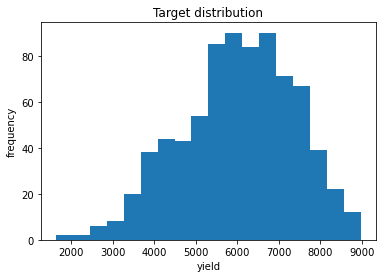

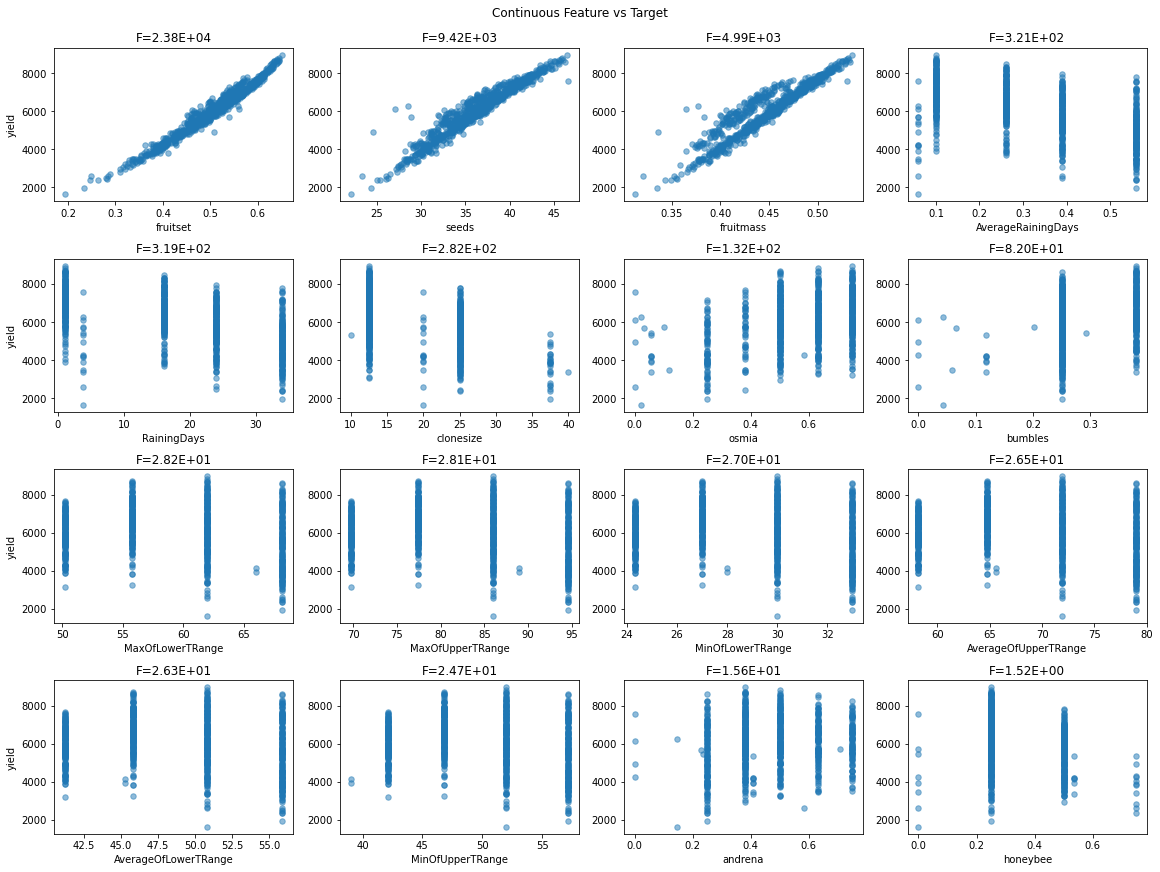

In [10]:
dabl.plot(data, target_col = "RR") #Creating distribution figure for yield against all predictors/features

### Correlation

In [11]:
plt.figure(figsize=(20,20))
corr = data.corr()
corr

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.119745,0.004807,-0.008451,-0.139049,0.034157,0.032854,0.033752,0.034295,0.033768,0.033566,-0.021696,-0.024455,-0.556591,-0.474038,-0.496156,-0.516737
honeybee,0.119745,1.000000,-0.233954,-0.125913,-0.189058,0.026359,0.025467,0.026365,0.026477,0.026104,0.025647,-0.073818,-0.093477,-0.009406,-0.166419,-0.170808,-0.044250
bumbles,0.004807,-0.233954,1.000000,0.010758,0.293665,-0.022863,-0.005801,-0.015821,-0.024662,-0.016801,-0.013985,0.058063,0.075376,0.289890,0.358202,0.380206,0.309407
andrena,-0.008451,-0.125913,0.010758,1.000000,0.387379,-0.026497,-0.023887,-0.025578,-0.026775,-0.025623,-0.025115,0.035297,0.043739,0.102549,0.092470,0.089178,0.140277
osmia,-0.139049,-0.189058,0.293665,0.387379,1.000000,-0.063755,-0.043237,-0.055441,-0.065910,-0.056546,-0.053141,0.083667,0.104188,0.334178,0.336136,0.353116,0.380892
MaxOfUpperTRange,0.034157,0.026359,-0.022863,-0.026497,-0.063755,1.000000,0.990961,0.998314,0.999900,0.998842,0.997658,-0.003286,-0.005677,-0.130450,0.058492,-0.034486,-0.187075
MinOfUpperTRange,0.032854,0.025467,-0.005801,-0.023887,-0.043237,0.990961,1.000000,0.997056,0.988988,0.996267,0.997798,-0.000798,-0.001889,-0.119856,0.067671,-0.024240,-0.175883
AverageOfUpperTRange,0.033752,0.026365,-0.015821,-0.025578,-0.055441,0.998314,0.997056,1.000000,0.997413,0.999944,0.999923,-0.002325,-0.004195,-0.125082,0.064034,-0.028925,-0.181774
MaxOfLowerTRange,0.034295,0.026477,-0.024662,-0.026775,-0.065910,0.999900,0.988988,0.997413,1.000000,0.998071,0.996609,-0.003558,-0.006087,-0.130693,0.058487,-0.034674,-0.187439
MinOfLowerTRange,0.033768,0.026104,-0.016801,-0.025623,-0.056546,0.998842,0.996267,0.999944,0.998071,1.000000,0.999787,-0.002403,-0.004334,-0.126788,0.062093,-0.030727,-0.183339


<Figure size 1440x1440 with 0 Axes>

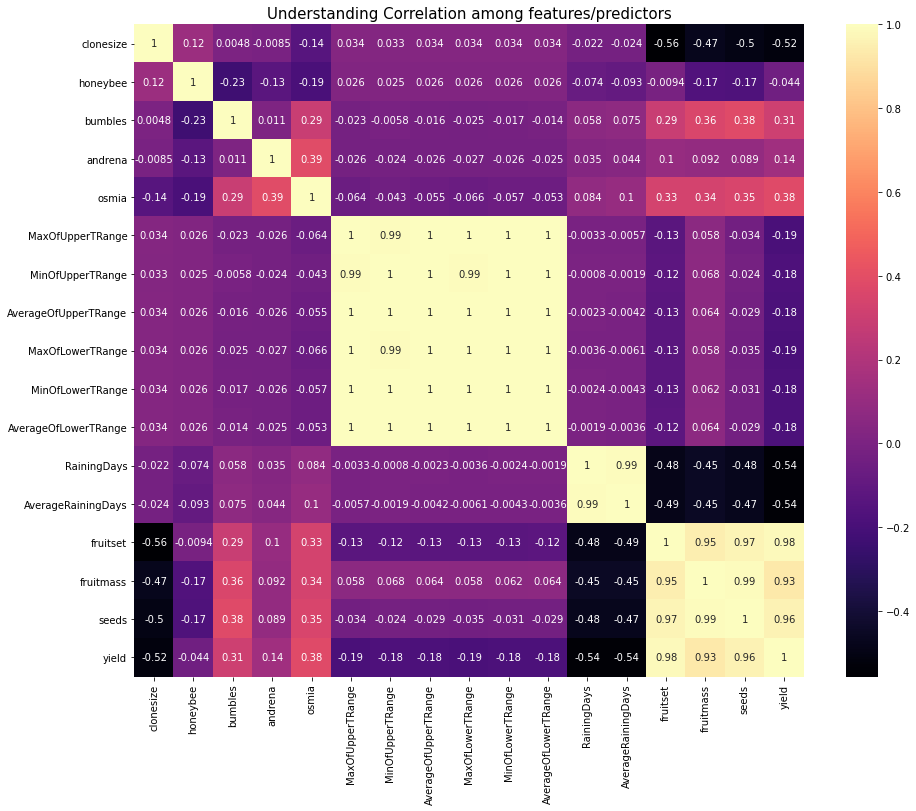

In [12]:
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot = True,  cmap ="magma")
plt.title('Understanding Correlation among features/predictors', fontsize=15)
plt.show()

### Outlier removal using InterQuartile Range


In [13]:
q1 = data.quantile(0.25)
q2 = data.quantile(0.75)
iqr = q2 - q1 #The middle 50% of the data

In [14]:
data = data[~((data < (q1 - 1.5 * iqr)) |(data > (q2 + 1.5 * iqr))).any(axis=1)]

In [15]:
#Using IQR since data is left skewed

## Splitting the data into Training Data and Testing Data

In [16]:
data.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [17]:
X = data[['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']]

In [18]:
X.shape

(752, 16)

In [19]:
y = data['yield']

In [20]:
y.mean()

6079.902113900264

In [21]:
y.shape

(752,)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40) 

In [23]:
X_train.shape

(601, 16)

In [24]:
X_test.shape

(151, 16)

In [24]:
# pca = PCA(n_components = 2) #Performing PCA

# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

# explained_variance = pca.explained_variance_ratio_
# print("Variance for each pca")
# explained_variance

Variance for each pca


array([0.55933503, 0.31965411])

#### There are 3 main metrics for model evaluation in regression:
R Square/Adjusted R Square

Mean Square Error(MSE)/Root Mean Square Error(RMSE)

Mean Absolute Error(MAE)

# Random Forest Regression

### Modeling the Data and Evaluating the model

In [25]:
# params = {
#     'n_estimators' : [25, 50, 75, 100, 150, 200], # Number of trees in the RF
# }
# rfreg = GridSearchCV(RandomForestRegressor(random_state = 40), params) # Exhaustive search over specified parameter values for an estimator.
                                                                    # The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

    
rfreg = RandomForestRegressor(n_estimators = 100)    
rfreg.fit(X_train, y_train)
scores_rf= cross_val_score(rfreg, X, y, cv=5)


Y_pred_rf = rfreg.predict(X_test)

rmse_rf = np.sqrt(np.mean((y_test - Y_pred_rf)**2)) #Calculating Root mean square Error
r2_rf = r2_score(Y_pred_rf, y_test) #Calculating Root Squared
MAE_rf = mean_absolute_error(Y_pred_rf, y_test) #Calculating Mean Absolute Error

print("%0.4f accuracy with a standard deviation of %0.3f" % (scores_rf.mean(), scores_rf.std()))


0.9670 accuracy with a standard deviation of 0.012


# XGBoost

### Modeling the Data and Evaluating the model

In [26]:
regressor = XGBRegressor(n_estimators = 100)

regressor.fit(X_train, y_train)
scores_xg= cross_val_score(regressor, X, y, cv=5)

Y_pred_xg = regressor.predict(X_test)

rmse_xg = np.sqrt(np.mean((y_test - Y_pred_xg)**2))
r2_xg = r2_score(Y_pred_xg, y_test)
MAE_xg = mean_absolute_error(Y_pred_xg, y_test)


print("%0.4f accuracy with a standard deviation of %0.3f" % (scores_xg.mean(), scores_xg.std()))


0.9709 accuracy with a standard deviation of 0.009


# Gradient Boosting

### Modeling the Data and Evaluating the model

In [27]:
Gradient_reg = GradientBoostingRegressor()

Gradient_reg.fit(X_train, y_train)
scores_grad= cross_val_score(Gradient_reg, X, y, cv=5)

Y_pred_grad = Gradient_reg.predict(X_test)

rmse_grad = np.sqrt(np.mean((y_test - Y_pred_grad)**2))
r2_grad = r2_score(Y_pred_xg, y_test)
MAE_grad = mean_absolute_error(Y_pred_grad, y_test)

print("%0.4f accuracy with a standard deviation of %0.3f" % (scores_grad.mean(), scores_grad.std()))


0.9767 accuracy with a standard deviation of 0.007


## Creating a dataframe for each Machine learning algorithm along with the metrics


In [28]:
model_frame = {'Model': ['RandomForestRegression', 'XGBoostRegression', 'GradientBoostRegression'], 
               'R Squared': [r2_rf, r2_xg, r2_grad],
                'Root Mean Square Error':[rmse_rf, rmse_xg, rmse_grad],
              'Mean Absolute Error':[MAE_rf, MAE_xg, MAE_grad]}
df = pd.DataFrame(model_frame)
df

,Model,R Squared,Root Mean Square Error,Mean Absolute Error
0,RandomForestRegression,0.988226,141.953432,112.716817
1,XGBoostRegression,0.988889,137.236645,109.777332
2,GradientBoostRegression,0.988889,124.203760,97.467919


# Explainable AI 

### SHAP

#### The plot below shows the SHAP feature importance measured as the mean absolute Shapley values. The variable fruitset was the most important feature, changing the predicted yield on average by 1000 on x-axis using XGboost. Followed by RainingDays changing the predicted yield on average by 50 on x-axis.

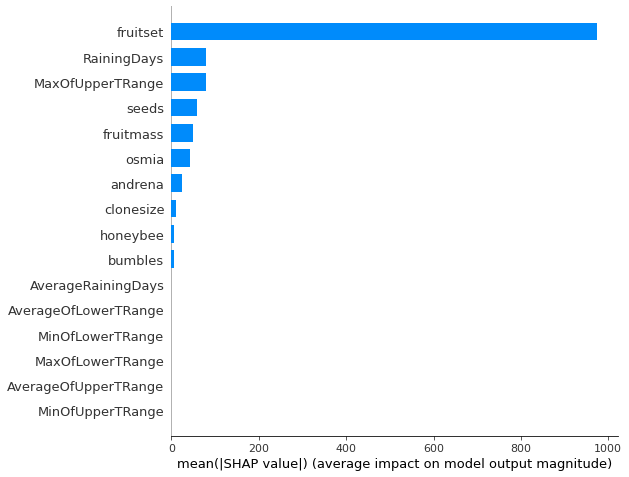

In [29]:
shap_values = shap.TreeExplainer(regressor).shap_values(X_train) #XGboost regressor
shap.summary_plot(shap_values, X_train, plot_type="bar") #Visualizing the most impactful feature for the target value

#### The plot below shows the SHAP feature importance measured as the mean absolute Shapley values. The variable fruitset was the most important feature, changing the predicted yield on average by 1000 on x-axis using Random Forest Regressor. Followed by Seeds changing the predicted yield on average by 200 on x-axis.

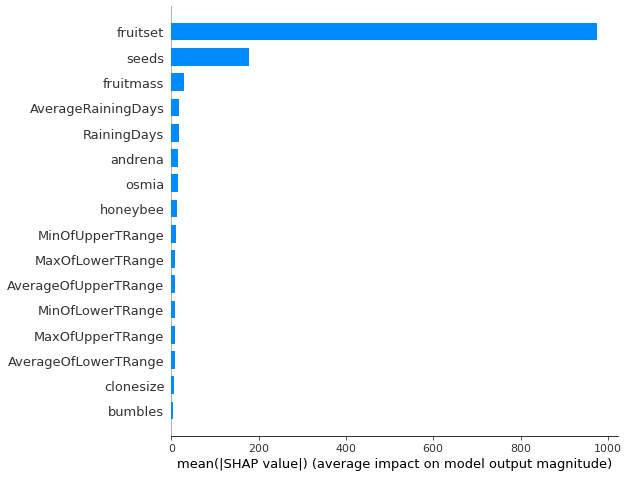

In [30]:
shap_values_2 = shap.TreeExplainer(rfreg).shap_values(X_train)
shap.summary_plot(shap_values_2, X_train, plot_type="bar") #Random Forest regressor

#### The plot below shows the SHAP feature importance measured as the mean absolute Shapley values. The variable fruitset was the most important feature, changing the predicted yield on average by 1000 on x-axis using Random Forest Regressor. Followed by Seeds changing the predicted yield on average by 200 on x-axis.

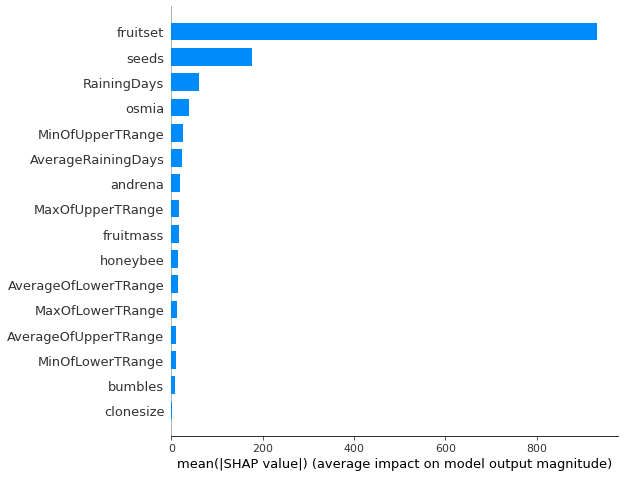

In [31]:
shap_values_3 = shap.TreeExplainer(Gradient_reg).shap_values(X_train)
shap.summary_plot(shap_values_3, X_train, plot_type="bar") #Gradient Boosting

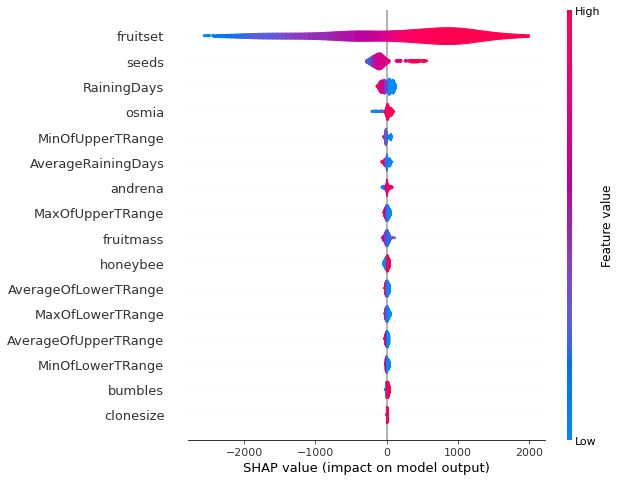

In [32]:
shap.summary_plot(shap_values_3, X_train, plot_type = 'violin') #Gradient Boosting

In [41]:
explainer_xg = shap.TreeExplainer(regressor) # XGboost Shap
shap_values_xg = explainer_xg.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer_xg.expected_value, shap_values_xg[0,:], X_train.iloc[0,:])

#### The above plot shows features each contributing to push the model output from the base value (the average model output over the trian we passed) to the model output. Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue.

#### If you subtract the length of the blue bars from the length of the pink bars,  it equals the distance from the base value to the output.


In [45]:
explainer_grad = shap.TreeExplainer(Gradient_reg) # Gradient Boosting Shap
shap_values_grad = explainer_grad.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer_grad.expected_value, shap_values_grad[15,:], X_train.iloc[15,:])

In [35]:
explainer_rf = shap.TreeExplainer(rfreg) # Random Forest Shap
shap_values_rf = explainer_rf.shap_values(X_train)

# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer_rf.expected_value, shap_values_rf[0,:], X_train.iloc[0,:])

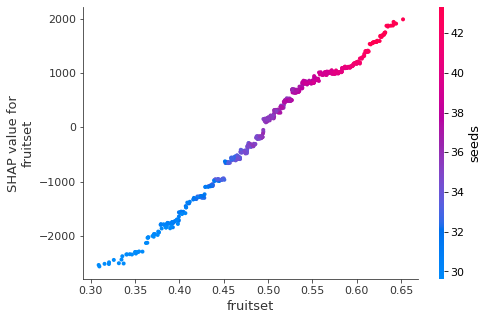

In [36]:
shap.dependence_plot('fruitset', shap_values_grad, X_train) #Gradiet Boosting

###### The SHAP Dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic or more complex.

#### The function automatically includes another variable that the chosen variable interacts most with. The above plot shows there is an approximately linear and positive trend between fruitset and the target variable, and fruitset interacts with seeds frequently.